In [ ]:
from pathlib import Path
import os
import warnings
import sys
from pprint import pprint

%load_ext autoreload
%autoreload

# ignore warnings for now ...
warnings.filterwarnings('ignore')

os.chdir('/Users/tommylees/github/ml_drought')

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
raw_data = xr.open_dataset(data_dir / 'raw' / 'reanalysis-era5-single-levels-monthly-means/2m_temperature/2010_2011' / '01_12.nc')
raw_data.mean(dim='time').t2m.plot()

# The raw data

In [15]:
raw_vhi = xr.open_dataset(data_dir / 'raw' / 'vhi/2010/VHP.G04.C07.NN.P2010001.VH.nc')
raw_vhi

<xarray.Dataset>
Dimensions:  (HEIGHT: 3616, WIDTH: 10000)
Dimensions without coordinates: HEIGHT, WIDTH
Data variables:
    VCI      (HEIGHT, WIDTH) float32 ...
    TCI      (HEIGHT, WIDTH) float32 ...
    VHI      (HEIGHT, WIDTH) float32 ...
    QA       (HEIGHT, WIDTH) float32 ...
Attributes:
    VERSION:                 VH (vh.exe,version 1.3, March 21 2012)
    SATELLITE:               NN
    INSTRUMENT:              AVHRR
    CITATION_TO_DOCUMENTS:   User Guide of Vegetation Health(VH) system (vers...
    CONTACT:                 NOAA/NESDIS/STAR/EMB
    PRODUCT_NAME:            Vegetation Health
    PROJECTION:              Plate_Carree
    DATE_BEGIN:              1
    DATE_END:                7
    TIME_BEGIN:              00:00 UTC (use day time data only)
    TIME_END:                23:59 UTC (use day time data only)
    ANCILLARY_FILES:         FILE_CONFIGURE:vh.config_NN\nFILE_PRELAUNCH_CALI...
    CONFIGURE_FILE_CONTENT:  [Options for vh.exe]\nDIR_Ancillary=            

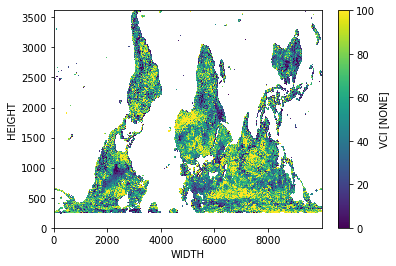

In [16]:
raw_vhi.VCI.plot()

# Preprocessors

In [17]:
e = ERA5MonthlyMeanPreprocessor(data_dir)
e.preprocess()

Reading data from /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/raw. Writing to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/reanalysis-era5-single-levels-monthly-means_interim
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/reanalysis-era5-single-levels-monthly-means_interim/2010_01_12_2m_temperature_kenya.nc
Done for ERA5 01_12.nc
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/reanalysis-era5-single-levels-monthly-means_interim/2010_2011_01_12_2m_temperature_kenya.nc
Done for ERA5 01_12.nc
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/reanalysis-era5-single-levels-monthly-means_interim/2010_01_12_evaporation_kenya.nc
Done for ERA5 01_12.nc
Processing 01_12.nc
selecting region: kenya from ds
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/reanalysis-era5-single-levels-

In [ ]:
processed_data = xr.open_dataset(data_dir / 'interim/reanalysis-era5-single-levels-monthly-means_preprocessed/data_kenya.nc')
processed_data

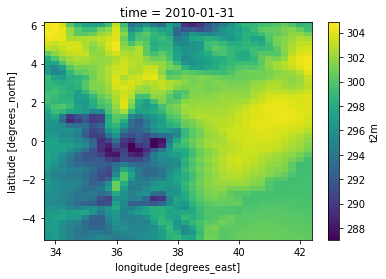

In [38]:
processed_data.t2m.isel(time=0).plot()

In [19]:
v = VHIPreprocessor(data_dir)
regrid_path = data_dir / 'interim/reanalysis-era5-single-levels-monthly-means_preprocessed/data_kenya.nc'
v.preprocess(subset_str='kenya', regrid=regrid_path)

Reading data from /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/raw.             Writing to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/VHI_interim
Starting work on /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/raw/vhi/2010/VHP.G04.C07.NP.P2010029.VH.nc
Starting work on VHP.G04.C07.NP.P2010029.VH.nc
selecting region: kenya from ds
Create weight file: /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/nearest_s2d_311x244_45x35_0.63.nc
- regridding var VHI -
Regridded from (311, 244) to (45, 35)
Remove file /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/nearest_s2d_311x244_45x35_0.63.nc
Saving to /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/VHI_interim/STAR_VHP.G04.C07.NP_2010_7_19_kenya_VH.nc
** Done for VHI VHP.G04.C07.NP.P2010029.VH.nc **

**** /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/VHI_preprocessed/data_kenya.nc Created! ****



In [20]:
vhi = xr.open_dataset('/Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/VHI_preprocessed/data_kenya.nc')
vhi

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 35, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2010-07-31
  * lon      (lon) float32 33.75 34.0 34.25 34.5 34.75 ... 41.5 41.75 42.0 42.25
  * lat      (lat) float32 6.0 5.75 5.5 5.25 5.0 ... -4.0 -4.25 -4.5 -4.75 -5.0
Data variables:
    VHI      (time, lat, lon) float64 ...

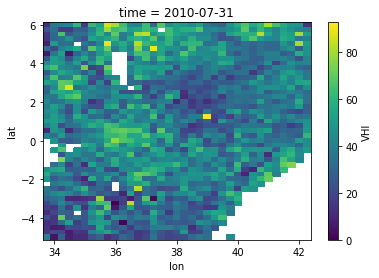

In [21]:
vhi.VHI.plot()

# Engineer

In [22]:
engineer = Engineer(data_dir, process_static=False)
engineer.engineer(test_year=2011, target_variable='e', pred_months=3, expected_length=3)

Processing /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/reanalysis-era5-single-levels-monthly-means_preprocessed/data_kenya.nc
Processing /Volumes/Lees_Extend/data/ecmwf_sowc/data2_/interim/VHI_preprocessed/data_kenya.nc
Generating data for year: 2011, target month: 1
Max date: 2011-01-31, max input date: 2010-12-31, min input date: 2010-09-30
Wrong number of y values! Expected 1, got 0; returning None
Generating data for year: 2011, target month: 2
Max date: 2011-02-28, max input date: 2011-01-31, min input date: 2010-10-31
Wrong number of y values! Expected 1, got 0; returning None
Generating data for year: 2011, target month: 3
Max date: 2011-03-31, max input date: 2011-02-28, min input date: 2010-11-30
Wrong number of y values! Expected 1, got 0; returning None
Generating data for year: 2011, target month: 4
Max date: 2011-04-30, max input date: 2011-03-31, min input date: 2010-12-31
Wrong number of y values! Expected 1, got 0; returning None
Generating data for year: 2011, 

In [ ]:
[f.name for f in (data_dir / 'features' / 'one_month_forecast' / 'test').iterdir()]

# Models

In [23]:
rnn = RecurrentNetwork(hidden_size=100, data_folder=data_dir, include_static=False)
lr = LinearRegression(data_dir, include_static=False)
bline = Persistence(data_dir)

In [24]:
lr.train()
lr.evaluate(save_preds=True)

Training linear_regression for experiment one_month_forecast
2.7701436636004693e-06
1.5552043623129068e-05
8.165324834554575e-06
2.7259138414134047e-06
3.4959185489248386e-06
5.696219708211754e-06
1.2864834379694967e-05
3.1601756371688156e-06
6.733859425393959e-06
1.8366113943433437e-06
4.571703397478769e-06
2.4017189195901638e-06
4.737922167314628e-06
8.435937612519678e-06
4.252921833274487e-06
4.7726272591978565e-06
2.9456664308254133e-06
2.2924261934777595e-06
8.036899737394029e-06
1.2764466433795786e-05
7.5192911782906485e-06
9.95116009596169e-06
8.202316648738443e-06
1.1527969434215024e-05
2.3583767000453357e-06
5.977618665037139e-06
2.667687665057449e-06
7.1842729833610265e-06
5.455163272373376e-06
2.648168802879117e-06
9.49730346640464e-06
7.786603484559581e-06
7.164320114245069e-06
1.3638618223578434e-05
5.579558076578362e-06
8.29728417634914e-06
7.470239554551589e-06
6.070141957844544e-06
4.595165864231648e-06
2.9038616912329035e-06
2.5835619547134156e-06
4.812949040124282e-06

In [25]:
rnn.train(num_epochs=10)
rnn.evaluate(save_preds=True)

Training rnn for experiment one_month_forecast
Epoch 1, train smooth L1: 0.07128666600867829, RMSE: 0.3620145731789115
Epoch 2, train smooth L1: 0.05592045232791592, RMSE: 0.3322070031076933
Epoch 3, train smooth L1: 0.055128312290266705, RMSE: 0.3256608219002929
Epoch 4, train smooth L1: 0.03656790637911332, RMSE: 0.2587948347045179
Epoch 5, train smooth L1: 0.03158996197291546, RMSE: 0.24293442346463479
Epoch 6, train smooth L1: 0.025997596439319075, RMSE: 0.2200845676479567
Epoch 7, train smooth L1: 0.0202796133623148, RMSE: 0.19599622297469713
Epoch 8, train smooth L1: 0.0167209376986311, RMSE: 0.1747505059144487
Epoch 9, train smooth L1: 0.01741650349436828, RMSE: 0.17551861134477953
Epoch 10, train smooth L1: 0.010459681295927751, RMSE: 0.13846900413348
RMSE: 0.10804519057273865


In [26]:
bline.train()
bline.evaluate(save_preds=True)

RMSE: 0.0006736067007295787


# Analysis

In [27]:
[f.name for f in (data_dir / 'models' / 'one_month_forecast' / 'rnn').iterdir()]

['preds_2011_1.nc',
 'preds_2011_10.nc',
 'preds_2011_11.nc',
 'preds_2011_12.nc',
 'preds_2011_2.nc',
 'preds_2011_3.nc',
 'preds_2011_4.nc',
 'preds_2011_5.nc',
 'preds_2011_6.nc',
 'preds_2011_7.nc',
 'preds_2011_8.nc',
 'preds_2011_9.nc',
 'results.json']

In [28]:
from src.analysis import read_pred_data, read_true_data
from src.analysis import annual_scores

In [29]:
rnn_preds, _ = read_pred_data(data_dir=data_dir, model='rnn')
lr_preds, _ = read_pred_data(data_dir=data_dir, model='linear_regression')
bline_preds, _ = read_pred_data(data_dir=data_dir, model='previous_month')
y_test = read_true_data(data_dir, variable='e')

rnn_preds = rnn_preds.compute()
pprint(rnn_preds)

<xarray.Dataset>
Dimensions:  (lat: 45, lon: 35, time: 12)
Coordinates:
  * lat      (lat) float64 -5.0 -4.75 -4.5 -4.25 -4.0 ... 5.0 5.25 5.5 5.75 6.0
  * lon      (lon) float64 33.75 34.0 34.25 34.5 34.75 ... 41.5 41.75 42.0 42.25
  * time     (time) datetime64[ns] 2011-01-31 2011-02-28 ... 2011-12-31
Data variables:
    preds    (lat, lon, time) float32 0.16715993 -0.12853241 ... -0.124675944


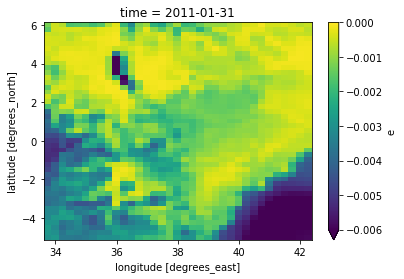

In [30]:
y_test.isel(time=0).plot(vmin=-0.006, vmax=0)

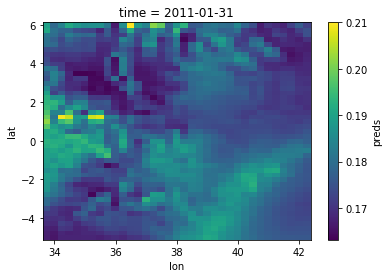

In [31]:
rnn_preds.preds.isel(time=0).plot()

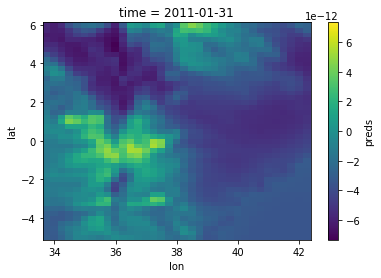

In [32]:
lr_preds.preds.isel(time=0).plot(cmap='viridis')

In [33]:
df = annual_scores(
    models=['linear_regression', 'rnn', 'previous_month'], data_path=data_dir, pred_year=2011, target_var='e', to_dataframe=True, verbose=False
)
df.head()

,linear_regression,month,previous_month,rnn,year,metric
0,0.002381,1.0,0.000534,0.179293,2011.0,rmse
1,0.002310,2.0,0.000401,0.126682,2011.0,rmse
2,0.002123,3.0,0.000488,0.198673,2011.0,rmse
3,0.002320,4.0,0.000501,0.137382,2011.0,rmse
4,0.002387,5.0,0.000828,0.049199,2011.0,rmse


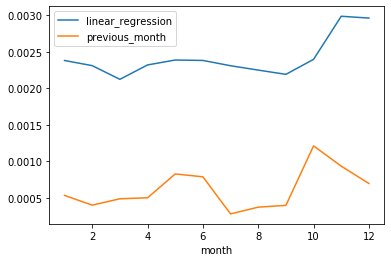

In [34]:
df.where(df.metric == 'rmse').drop(columns=['year', 'rnn']).plot(x='month')

In [ ]:
df.where(df.metric == 'rmse').drop(columns=['year']).plot(x='month');